<a href="https://colab.research.google.com/github/thariqziyad/data-generation/blob/main/data_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing packages

In [140]:
from scipy.stats import truncnorm as t_norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rand
import warnings
warnings.filterwarnings("ignore")

# Loading parameters

In [8]:
df = pd.read_csv('source.csv')
df

,No,Unnamed: 1,Service and Facilities,Expectation Value,Perception Value
0,TANGIBLE,1,Cleanliness and comfort of the hospital treatm...,3.92,3.04
1,TANGIBLE,2,"Quality of food (punctual, attractive presenta...",3.88,3.08
2,TANGIBLE,3,Cleanliness and completeness of nurse's room,3.76,3.04
3,TANGIBLE,4,Cleanliness of public toilets,3.70,2.72
4,TANGIBLE,5,Clarity of signs indicating the location (clin...,3.54,2.99
5,TANGIBLE,6,Neatness and appearance of the nurses in the i...,3.53,3.21
6,ASSURANCE,1,Friendliness and courtesy of inpatient securit...,3.68,3.07
7,ASSURANCE,2,Friendliness and courtesy of reception staff,3.72,3.11
8,ASSURANCE,3,Friendliness and courtesy of Hospital informat...,3.79,3.03
9,ASSURANCE,4,Doctor's ability to handle disease complaints,3.94,3.20


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      28 non-null     object 
 1   Unnamed: 1              28 non-null     int64  
 2   Service and Facilities  28 non-null     object 
 3   Expectation Value       28 non-null     float64
 4   Perception Value        28 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ KB


# Data cleaning

## Index:
 Create Multilevel index fot the DataFrame

In [7]:
df_index = df.iloc[:,0:2]
mult_index = pd.MultiIndex.from_frame(df_index, names=['Dimension', 'No'])
df2 = df.iloc[:,2:].set_index(mult_index,drop=True)
df2

Service and Facilities  \
Dimension      No                                                      
TANGIBLE       1   Cleanliness and comfort of the hospital treatm...   
               2   Quality of food (punctual, attractive presenta...   
               3        Cleanliness and completeness of nurse's room   
               4                       Cleanliness of public toilets   
               5   Clarity of signs indicating the location (clin...   
               6   Neatness and appearance of the nurses in the i...   
ASSURANCE      1   Friendliness and courtesy of inpatient securit...   
               2        Friendliness and courtesy of reception staff   
               3   Friendliness and courtesy of Hospital informat...   
               4       Doctor's ability to handle disease complaints   
               5          Nurse skills in performing nursing actions   
               6                 Collaboration of doctors and nurses   
Responsiveness 1             The speed and skill of the receptionist   
               2   The speed and skills of information officers i...   
               3   Hospital doctors' dexterity in responding to p...   
               4                     Follow up on patient complaints   
               5   Hospital nurse dexterity in responding to pati...   
               6   Hospital care attention in reminding the next ...   
EMPATHY        1   Attention and attitude of hospital doctors in ...   
               2   Attention and attitude of hospital nurses in s...   
               3       Ease of reaching the location of the Hospital   
               4   The safety and comfort of the hospital locatio...   
               5   Doctor's willingness to provide an explanation...   
               6   The nurse's concern for the explanation of the...   
Reliability    1                    Service is equal to all patients   
               2                    The same service every treatment   
               3   The results of the doctor's diagnosis in heali...   
               4   Availability of advanced care until the patien...   

                   Expectation Value  Perception Value  
Dimension      No                                       
TANGIBLE       1                3.92              3.04  
               2                3.88              3.08  
               3                3.76              3.04  
               4                3.70              2.72  
               5                3.54              2.99  
               6                3.53              3.21  
ASSURANCE      1                3.68              3.07  
               2                3.72              3.11  
               3                3.79              3.03  
               4                3.94              3.20  
               5                3.93              3.06  
               6                3.92              3.12  
Responsiveness 1                3.76              2.92  
               2                3.77              2.92  
               3                3.89              3.04  
               4                3.88              3.12  
               5                3.83              3.03  
               6                3.74              3.08  
EMPATHY        1                3.89              3.36  
               2                3.84              3.28  
               3                3.61              3.09  
               4                3.78              3.26  
               5                3.88              3.06  
               6                3.80              3.07  
Reliability    1                3.74              3.01  
               2                3.77              3.09  
               3                3.90              3.13  
               4                3.82              3.12

## Columns
Rename columns to help call the data

In [12]:
df3 = df2.rename(columns={'Expectation Value':'expec_mean','Perception Value':'percep_mean'})
df3

Service and Facilities  \
Dimension      No                                                      
TANGIBLE       1   Cleanliness and comfort of the hospital treatm...   
               2   Quality of food (punctual, attractive presenta...   
               3        Cleanliness and completeness of nurse's room   
               4                       Cleanliness of public toilets   
               5   Clarity of signs indicating the location (clin...   
               6   Neatness and appearance of the nurses in the i...   
ASSURANCE      1   Friendliness and courtesy of inpatient securit...   
               2        Friendliness and courtesy of reception staff   
               3   Friendliness and courtesy of Hospital informat...   
               4       Doctor's ability to handle disease complaints   
               5          Nurse skills in performing nursing actions   
               6                 Collaboration of doctors and nurses   
Responsiveness 1             The speed and skill of the receptionist   
               2   The speed and skills of information officers i...   
               3   Hospital doctors' dexterity in responding to p...   
               4                     Follow up on patient complaints   
               5   Hospital nurse dexterity in responding to pati...   
               6   Hospital care attention in reminding the next ...   
EMPATHY        1   Attention and attitude of hospital doctors in ...   
               2   Attention and attitude of hospital nurses in s...   
               3       Ease of reaching the location of the Hospital   
               4   The safety and comfort of the hospital locatio...   
               5   Doctor's willingness to provide an explanation...   
               6   The nurse's concern for the explanation of the...   
Reliability    1                    Service is equal to all patients   
               2                    The same service every treatment   
               3   The results of the doctor's diagnosis in heali...   
               4   Availability of advanced care until the patien...   

                   expec_mean  percep_mean  
Dimension      No                           
TANGIBLE       1         3.92         3.04  
               2         3.88         3.08  
               3         3.76         3.04  
               4         3.70         2.72  
               5         3.54         2.99  
               6         3.53         3.21  
ASSURANCE      1         3.68         3.07  
               2         3.72         3.11  
               3         3.79         3.03  
               4         3.94         3.20  
               5         3.93         3.06  
               6         3.92         3.12  
Responsiveness 1         3.76         2.92  
               2         3.77         2.92  
               3         3.89         3.04  
               4         3.88         3.12  
               5         3.83         3.03  
               6         3.74         3.08  
EMPATHY        1         3.89         3.36  
               2         3.84         3.28  
               3         3.61         3.09  
               4         3.78         3.26  
               5         3.88         3.06  
               6         3.80         3.07  
Reliability    1         3.74         3.01  
               2         3.77         3.09  
               3         3.90         3.13  
               4         3.82         3.12

# Standard deviation

Given that the standard deviation is not part of the given data, I took the liberty of choosing standard deviation values that will give a precise value, as indicated in this notebook (insert link)

In [55]:
stmu = pd.read_csv('st_mu.csv')
st_mu = stmu.set_index('mean')

st_filter = st_mu.loc[df3.iloc[5,2]]<10000
[i for i in st_mu.T[st_filter].loc[:,df3.iloc[5,2]].index]

['0.612', '0.65']

In [83]:
def choose_std(df,st_mu,i,j):
  st_filter = st_mu.loc[df.iloc[i,j]]<10000
  st_list = [i for i in st_mu.T[st_filter].loc[:,df.iloc[i,j]].index]
  return float(rand.choice(st_list))

In [84]:
expec_std = []
for i in range(len(df3.index)):
  expec_std.append(choose_std(df3,st_mu,i,1))

percep_std = []
for i in range(len(df3.index)):
  percep_std.append(choose_std(df3,st_mu,i,2))

df3['expec_std'] = expec_std
df3['percep_std'] = percep_std
df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 28 entries, ('TANGIBLE', 1) to ('Reliability', 4)
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Service and Facilities  28 non-null     object 
 1   expec_mean              28 non-null     float64
 2   percep_mean             28 non-null     float64
 3   expec_std               28 non-null     float64
 4   percep_std              28 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.7+ KB


In [85]:
df3

Service and Facilities  \
Dimension      No                                                      
TANGIBLE       1   Cleanliness and comfort of the hospital treatm...   
               2   Quality of food (punctual, attractive presenta...   
               3        Cleanliness and completeness of nurse's room   
               4                       Cleanliness of public toilets   
               5   Clarity of signs indicating the location (clin...   
               6   Neatness and appearance of the nurses in the i...   
ASSURANCE      1   Friendliness and courtesy of inpatient securit...   
               2        Friendliness and courtesy of reception staff   
               3   Friendliness and courtesy of Hospital informat...   
               4       Doctor's ability to handle disease complaints   
               5          Nurse skills in performing nursing actions   
               6                 Collaboration of doctors and nurses   
Responsiveness 1             The speed and skill of the receptionist   
               2   The speed and skills of information officers i...   
               3   Hospital doctors' dexterity in responding to p...   
               4                     Follow up on patient complaints   
               5   Hospital nurse dexterity in responding to pati...   
               6   Hospital care attention in reminding the next ...   
EMPATHY        1   Attention and attitude of hospital doctors in ...   
               2   Attention and attitude of hospital nurses in s...   
               3       Ease of reaching the location of the Hospital   
               4   The safety and comfort of the hospital locatio...   
               5   Doctor's willingness to provide an explanation...   
               6   The nurse's concern for the explanation of the...   
Reliability    1                    Service is equal to all patients   
               2                    The same service every treatment   
               3   The results of the doctor's diagnosis in heali...   
               4   Availability of advanced care until the patien...   

                   expec_mean  percep_mean  expec_std  percep_std  
Dimension      No                                                  
TANGIBLE       1         3.92         3.04      0.443       0.650  
               2         3.88         3.08      0.486       0.357  
               3         3.76         3.04      0.500       0.379  
               4         3.70         2.72      0.650       0.538  
               5         3.54         2.99      0.500       0.393  
               6         3.53         3.21      0.575       0.650  
ASSURANCE      1         3.68         3.07      0.650       0.379  
               2         3.72         3.11      0.575       0.350  
               3         3.79         3.03      0.612       0.471  
               4         3.94         3.20      0.486       0.575  
               5         3.93         3.06      0.407       0.400  
               6         3.92         3.12      0.538       0.371  
Responsiveness 1         3.76         2.92      0.486       0.493  
               2         3.77         2.92      0.436       0.464  
               3         3.89         3.04      0.464       0.612  
               4         3.88         3.12      0.386       0.421  
               5         3.83         3.03      0.371       0.650  
               6         3.74         3.08      0.464       0.350  
EMPATHY        1         3.89         3.36      0.479       0.612  
               2         3.84         3.28      0.457       0.612  
               3         3.61         3.09      0.650       0.612  
               4         3.78         3.26      0.471       0.538  
               5         3.88         3.06      0.414       0.350  
               6         3.80         3.07      0.457       0.357  
Reliability    1         3.74         3.01      0.612       0.400  
               2         3.77         3.09      0

# Generating data

## Create function

To help ease coding

In [176]:
mu = 3.53
std = 0.575

def data_gen(mu,std,responden):
  a_trunc = 1
  b_trunc = 4
  a, b = (a_trunc - mu) / std, (b_trunc - mu) / std

  #initializing variables
  mu_dif = 5
  std_dif = 5
  iter = 0

  while mu_dif > 0.005 or std_dif > 0.005:
    random_numbers = t_norm.rvs(a, b, loc=mu, scale=std,size=responden)
    if mu>3.5:
      std_b = np.std(random_numbers)
      mu_b = np.mean(random_numbers)
      fin_num = mu + ((random_numbers-mu_b)*std/std_b)
    else:
      fin_num = random_numbers
    integers = np.round(fin_num).astype(int)
    mu_dif = abs(np.mean(integers)-mu)
    std_dif = abs(np.std(integers)-std)
    iter += 1
    if iter > 9999:
      break

  return integers,iter


fin,iter = data_gen(mu,std,155)
print(iter)

print("Desired Mean:", mu)
print("Actual Mean of Generated Integers:", np.mean(fin))
print("Mean difference:",abs(np.mean(fin)-mu))
print("Desired Standard Deviation:", std)
print("Actual Standard Deviation of Generated Integers:", np.std(fin))
print("Standard Deviation difference:",abs(np.std(fin)-std))
print(fin.max(),fin.min())
print(set(fin))

37
Desired Mean: 3.53
Actual Mean of Generated Integers: 3.529032258064516
Mean difference: 0.000967741935483879
Desired Standard Deviation: 0.575
Actual Standard Deviation of Generated Integers: 0.571468706781382
Standard Deviation difference: 0.0035312932186180035
4 2
{2, 3, 4}


## Generate data

### Expectation values

In [91]:
#Value did not give good result on first try
df3.loc[('TANGIBLE', 5),'expec_std'] = 0.538
df3.loc[('TANGIBLE', 5)]

Service and Facilities    Clarity of signs indicating the location (clin...
expec_mean                                                             3.54
percep_mean                                                            2.99
expec_std                                                             0.538
percep_std                                                            0.393
Name: (TANGIBLE, 5), dtype: object

In [96]:
#Value did not give good result on first try
df3.loc[('Responsiveness', 4),'expec_std'] = 0.364
df3.loc[('Responsiveness', 4)]

Service and Facilities    Follow up on patient complaints
expec_mean                                           3.88
percep_mean                                          3.12
expec_std                                           0.364
percep_std                                          0.421
Name: (Responsiveness, 4), dtype: object

In [97]:
res_dict = {}
data_length = 155

for i in df3.index:
  mu_gen = df3.expec_mean[i]
  std_gen = df3.expec_std[i]
  all_data,iter =  data_gen(mu_gen,std_gen,data_length)
  print(i,':',iter)
  if iter==10000:
    break
  res_dict[i] = [x for x in all_data]
  res_dict[i].append(mu_gen)
  res_dict[i].append(np.mean(all_data))
  res_dict[i].append(abs(mu_gen-np.mean(all_data)))
  res_dict[i].append(std_gen)
  res_dict[i].append(np.std(all_data))
  res_dict[i].append(abs(std_gen-np.std(all_data)))

data_expec = pd.DataFrame.from_dict(res_dict)
compare_idx = {
    data_length:'Original mean',
    data_length+1:'Resulting mean',
    data_length+2:'Mean difference',
    data_length+3:'Original standard deviation',
    data_length+4:'Resulting standard deviation',
    data_length+5:'Standard deviation difference',
}
data_expec.rename(index=compare_idx,inplace=True)
data_expec.rename_axis(columns=['Dimension','No'],inplace=True)
data_expec.tail(10)

('TANGIBLE', 1) : 824
('TANGIBLE', 2) : 485
('TANGIBLE', 3) : 397
('TANGIBLE', 4) : 272
('TANGIBLE', 5) : 349
('TANGIBLE', 6) : 37
('ASSURANCE', 1) : 33
('ASSURANCE', 2) : 405
('ASSURANCE', 3) : 223
('ASSURANCE', 4) : 191
('ASSURANCE', 5) : 7138
('ASSURANCE', 6) : 2608
('Responsiveness', 1) : 114
('Responsiveness', 2) : 32
('Responsiveness', 3) : 6442
('Responsiveness', 4) : 967
('Responsiveness', 5) : 18
('Responsiveness', 6) : 124
('EMPATHY', 1) : 1850
('EMPATHY', 2) : 692
('EMPATHY', 3) : 97
('EMPATHY', 4) : 394
('EMPATHY', 5) : 1699
('EMPATHY', 6) : 8134
('Reliability', 1) : 264
('Reliability', 2) : 209
('Reliability', 3) : 455
('Reliability', 4) : 3777


TANGIBLE                                \
                                      1         2         3         4   
151                            4.000000  4.000000  4.000000  4.000000   
152                            4.000000  4.000000  4.000000  4.000000   
153                            4.000000  4.000000  4.000000  4.000000   
154                            4.000000  4.000000  4.000000  4.000000   
Original mean                  3.920000  3.880000  3.760000  3.700000   
Resulting mean                 3.922581  3.877419  3.761290  3.696774   
Mean difference                0.002581  0.002581  0.001290  0.003226   
Original standard deviation    0.443000  0.486000  0.500000  0.650000   
Resulting standard deviation   0.447725  0.486402  0.496229  0.646322   
Standard deviation difference  0.004725  0.000402  0.003771  0.003678   

                                                  ASSURANCE            \
                                      5         6         1         2   
151                            4.000000  4.000000  4.000000  4.000000   
152                            4.000000  2.000000  4.000000  4.000000   
153                            4.000000  3.000000  4.000000  4.000000   
154                            4.000000  3.000000  3.000000  4.000000   
Original mean                  3.540000  3.530000  3.680000  3.720000   
Resulting mean                 3.541935  3.529032  3.677419  3.722581   
Mean difference                0.001935  0.000968  0.002581  0.002581   
Original standard deviation    0.538000  0.575000  0.650000  0.575000   
Resulting standard deviation   0.535678  0.571469  0.651900  0.574012   
Standard deviation difference  0.002322  0.003531  0.001900  0.000988   

                                                   ...   EMPATHY            \
                                      3         4  ...         1         2   
151                            4.000000  4.000000  ...  5.000000  4.000000   
152                            2.000000  4.000000  ...  4.000000  4.000000   
153                            4.000000  3.000000  ...  3.000000  4.000000   
154                            4.000000  3.000000  ...  3.000000  4.000000   
Original mean                  3.790000  3.940000  ...  3.890000  3.840000   
Resulting mean                 3.787097  3.935484  ...  3.890323  3.838710   
Mean difference                0.002903  0.004516  ...  0.000323  0.001290   
Original standard deviation    0.612000  0.486000  ...  0.479000  0.457000   
Resulting standard deviation   0.611578  0.490916  ...  0.476110  0.461189   
Standard deviation difference  0.000422  0.004916  ...  0.002890  0.004189   

                                                                       \
                                      3         4         5         6   
151                            3.000000  4.000000  3.000000  4.000000   
152                            2.000000  4.000000  4.000000  4.000000   
153                            4.000000  4.000000  4.000000  4.000000   
154                            3.000000  3.000000  3.000000  4.000000   
Original mean                  3.610000  3.780000  3.880000  3.800000   
Resulting mean                 3.606452  3.780645  3.877419  3.800000   
Mean difference                0.003548  0.000645  0.002581  0.000000   
Original standard deviation    0.650000  0.471000  0.414000  0.457000   
Resulting standard deviation   0.647544  0.472071  0.414814  0.460014   
Standard deviation difference  0.002456  0.001071  0.000814  0.003014   

                              Reliability                                
                                        1         2         3         4  
151                              3.000000  4.000000  4.000000  4.000000  
152                              3.000000  4.000000  3.000000  4.000000  
153                              4.000000  4.000000  4.000000  3.000000  
154                              4.000000  4.000000  4.000000  4.000000  
Original mean      

In [126]:
expec_plot = data_expec.T.reset_index()
expec_plot_index = expec_plot.iloc[:,0:2].astype('string')
mult_index = pd.MultiIndex.from_frame(expec_plot_index, names=['Dimension', 'No'])
expec_plot = expec_plot.iloc[:,2:].set_index(mult_index,drop=True).T
expec_plot.columns = expec_plot.columns.map('_'.join)
expec_plot.head(2)

,TANGIBLE_1,TANGIBLE_2,TANGIBLE_3,TANGIBLE_4,TANGIBLE_5,TANGIBLE_6,ASSURANCE_1,ASSURANCE_2,ASSURANCE_3,ASSURANCE_4,...,EMPATHY_1,EMPATHY_2,EMPATHY_3,EMPATHY_4,EMPATHY_5,EMPATHY_6,Reliability_1,Reliability_2,Reliability_3,Reliability_4
0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,5.0,...,4.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,5.0,4.0
1,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


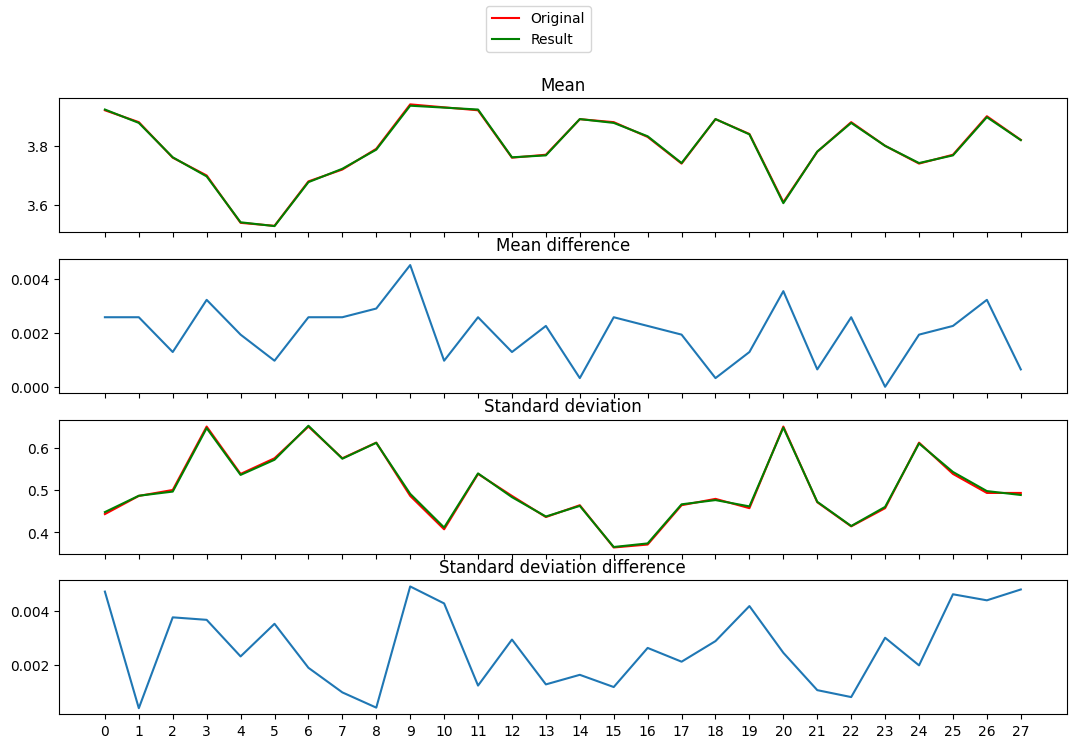

In [142]:
x = np.array(expec_plot.columns)
mu_ori = np.array([i for i in expec_plot.loc['Original mean',:]])
mu_res = np.array([i for i in expec_plot.loc['Resulting mean',:]])
mu_dif = np.array([i for i in expec_plot.loc['Mean difference',:]])
st_ori = np.array([i for i in expec_plot.loc['Original standard deviation',:]])
st_res = np.array([i for i in expec_plot.loc['Resulting standard deviation',:]])
st_dif = np.array([i for i in expec_plot.loc['Standard deviation difference',:]])

fig, ax = plt.subplots(4,sharex=True,figsize=(13,8))

ax[0].plot(x,mu_ori,color='red',label='Original')
ax[0].plot(x,mu_res,color='green',label='Result')
ax[0].set_title('Mean')
ax[1].plot(x,mu_dif)
ax[1].set_title('Mean difference')
ax[2].plot(x,st_ori,color='red')
ax[2].plot(x,st_res,color='green')
ax[2].set_title('Standard deviation')
ax[3].plot(x,st_dif)
ax[3].set_title('Standard deviation difference')
ax[3].set_xticklabels(ax[3].get_xticks(), rotation = 0)

fig.legend(loc='upper center')

### Perception values

In [148]:
#Value did not give good result on first try
df3.loc[('ASSURANCE', 3),'percep_std'] = 0.407
df3.loc[('ASSURANCE', 3)]

Service and Facilities    Friendliness and courtesy of Hospital informat...
expec_mean                                                             3.79
percep_mean                                                            3.03
expec_std                                                             0.407
percep_std                                                            0.407
Name: (ASSURANCE, 3), dtype: object

In [151]:
#Value did not give good result on first try
df3.loc[('ASSURANCE', 4),'percep_std'] = 0.65
df3.loc[('ASSURANCE', 4)]

Service and Facilities    Doctor's ability to handle disease complaints
expec_mean                                                         3.94
percep_mean                                                         3.2
expec_std                                                         0.486
percep_std                                                         0.65
Name: (ASSURANCE, 4), dtype: object

In [167]:
#Value did not give good result on first try
df3.loc[('ASSURANCE', 6),'percep_std'] = 0.65
df3.loc[('ASSURANCE', 6)]

Service and Facilities    Collaboration of doctors and nurses
expec_mean                                               3.92
percep_mean                                              3.12
expec_std                                               0.538
percep_std                                               0.65
Name: (ASSURANCE, 6), dtype: object

In [187]:
#Value did not give good result on first try
df3.loc[('EMPATHY', 1),'percep_std'] = 0.6
df3.loc[('EMPATHY', 1)]

Service and Facilities    Attention and attitude of hospital doctors in ...
expec_mean                                                             3.89
percep_mean                                                            3.36
expec_std                                                             0.479
percep_std                                                              0.6
Name: (EMPATHY, 1), dtype: object

In [191]:
res_dict = {}
data_length = 155

for i in df3.index:
  mu_gen = df3.percep_mean[i]
  std_gen = df3.percep_std[i]
  all_data,iter =  data_gen(mu_gen,std_gen,data_length)
  print(i,':',iter)
  if iter==10000:
    break
  res_dict[i] = [x for x in all_data]
  res_dict[i].append(mu_gen)
  res_dict[i].append(np.mean(all_data))
  res_dict[i].append(abs(mu_gen-np.mean(all_data)))
  res_dict[i].append(std_gen)
  res_dict[i].append(np.std(all_data))
  res_dict[i].append(abs(std_gen-np.std(all_data)))

data_percep = pd.DataFrame.from_dict(res_dict)
compare_idx = {
    data_length:'Original mean',
    data_length+1:'Resulting mean',
    data_length+2:'Mean difference',
    data_length+3:'Original standard deviation',
    data_length+4:'Resulting standard deviation',
    data_length+5:'Standard deviation difference',
}
data_percep.rename(index=compare_idx,inplace=True)
data_percep.rename_axis(columns=['Dimension','No'],inplace=True)
data_percep.tail(10)

('TANGIBLE', 1) : 333
('TANGIBLE', 2) : 88
('TANGIBLE', 3) : 330
('TANGIBLE', 4) : 318
('TANGIBLE', 5) : 486
('TANGIBLE', 6) : 3662
('ASSURANCE', 1) : 112
('ASSURANCE', 2) : 79
('ASSURANCE', 3) : 150
('ASSURANCE', 4) : 8537
('ASSURANCE', 5) : 41
('ASSURANCE', 6) : 61
('Responsiveness', 1) : 695
('Responsiveness', 2) : 42
('Responsiveness', 3) : 265
('Responsiveness', 4) : 53
('Responsiveness', 5) : 1282
('Responsiveness', 6) : 73
('EMPATHY', 1) : 6201
('EMPATHY', 2) : 3880
('EMPATHY', 3) : 975
('EMPATHY', 4) : 250
('EMPATHY', 5) : 219
('EMPATHY', 6) : 204
('Reliability', 1) : 17
('Reliability', 2) : 198
('Reliability', 3) : 153
('Reliability', 4) : 517


Dimension                      TANGIBLE                                \
No                                    1         2         3         4   
151                            3.000000  3.000000  3.000000  2.000000   
152                            3.000000  3.000000  3.000000  3.000000   
153                            3.000000  3.000000  3.000000  3.000000   
154                            4.000000  3.000000  3.000000  3.000000   
Original mean                  3.040000  3.080000  3.040000  2.720000   
Resulting mean                 3.038710  3.083871  3.038710  2.722581   
Mean difference                0.001290  0.003871  0.001290  0.002581   
Original standard deviation    0.650000  0.357000  0.379000  0.538000   
Resulting standard deviation   0.651389  0.358399  0.374749  0.539241   
Standard deviation difference  0.001389  0.001399  0.004251  0.001241   

Dimension                                         ASSURANCE            \
No                                    5         6         1         2   
151                            3.000000  3.000000  3.000000  3.000000   
152                            3.000000  4.000000  3.000000  3.000000   
153                            3.000000  3.000000  3.000000  3.000000   
154                            3.000000  4.000000  3.000000  3.000000   
Original mean                  2.990000  3.210000  3.070000  3.110000   
Resulting mean                 2.987097  3.206452  3.070968  3.109677   
Mean difference                0.002903  0.003548  0.000968  0.000323   
Original standard deviation    0.393000  0.650000  0.379000  0.350000   
Resulting standard deviation   0.393284  0.649534  0.378617  0.351361   
Standard deviation difference  0.000284  0.000466  0.000383  0.001361   

Dimension                                          ...   EMPATHY            \
No                                    3         4  ...         1         2   
151                            3.000000  3.000000  ...  3.000000  4.000000   
152                            3.000000  3.000000  ...  3.000000  4.000000   
153                            4.000000  2.000000  ...  4.000000  2.000000   
154                            3.000000  4.000000  ...  3.000000  3.000000   
Original mean                  3.030000  3.200000  ...  3.360000  3.280000   
Resulting mean                 3.025806  3.200000  ...  3.361290  3.283871   
Mean difference                0.004194  0.000000  ...  0.001290  0.003871   
Original standard deviation    0.407000  0.650000  ...  0.600000  0.612000   
Resulting standard deviation   0.408749  0.646579  ...  0.599827  0.609122   
Standard deviation difference  0.001749  0.003421  ...  0.000173  0.002878   

Dimension                                                              \
No                                    3         4         5         6   
151                            3.000000  3.000000  3.000000  4.000000   
152                            3.000000  3.000000  3.000000  3.000000   
153                            2.000000  4.000000  3.000000  3.000000   
154                            3.000000  3.000000  3.000000  2.000000   
Original mean                  3.090000  3.260000  3.060000  3.070000   
Resulting mean                 3.090323  3.258065  3.058065  3.070968   
Mean difference                0.000323  0.001935  0.001935  0.000968   
Original standard deviation    0.612000  0.538000  0.350000  0.357000   
Resulting standard deviation   0.615580  0.542856  0.345267  0.361175   
Standard deviation difference  0.003580  0.004856  0.004733  0.004175   

Dimension                     Reliability                                
No                                      1         2         3         4  
151                              3.000000  4.000000  3.000000  3.000000  
152                              3.000000  3.000000  4.000000  3.000000  
153                              4.000000  3.000000  2.000000  4.000000  
154                              3.000000  3.000000  3.000000 

In [192]:
percep_plot = data_percep.T.reset_index()
percep_plot_index = percep_plot.iloc[:,0:2].astype('string')
mult_index = pd.MultiIndex.from_frame(percep_plot_index, names=['Dimension', 'No'])
percep_plot = percep_plot.iloc[:,2:].set_index(mult_index,drop=True).T
percep_plot.columns = percep_plot.columns.map('_'.join)
percep_plot.head(2)

,TANGIBLE_1,TANGIBLE_2,TANGIBLE_3,TANGIBLE_4,TANGIBLE_5,TANGIBLE_6,ASSURANCE_1,ASSURANCE_2,ASSURANCE_3,ASSURANCE_4,...,EMPATHY_1,EMPATHY_2,EMPATHY_3,EMPATHY_4,EMPATHY_5,EMPATHY_6,Reliability_1,Reliability_2,Reliability_3,Reliability_4
0,2.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,...,4.0,4.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0
1,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0,...,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


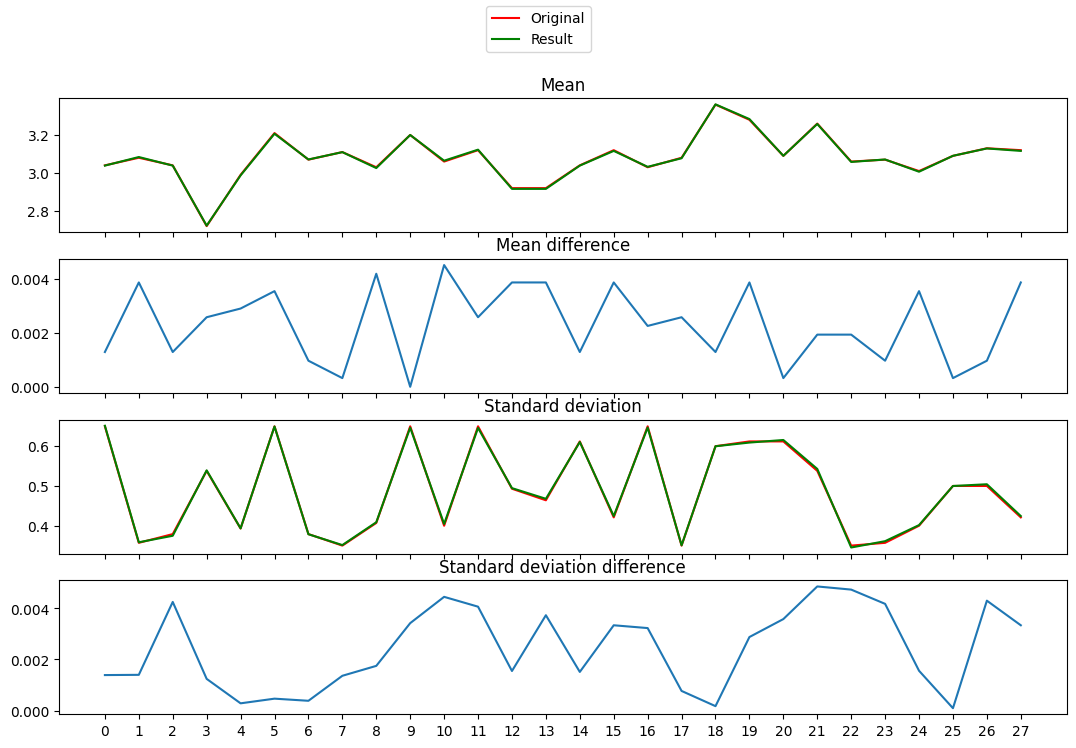

In [193]:
x = np.array(percep_plot.columns)
mu_ori = np.array([i for i in percep_plot.loc['Original mean',:]])
mu_res = np.array([i for i in percep_plot.loc['Resulting mean',:]])
mu_dif = np.array([i for i in percep_plot.loc['Mean difference',:]])
st_ori = np.array([i for i in percep_plot.loc['Original standard deviation',:]])
st_res = np.array([i for i in percep_plot.loc['Resulting standard deviation',:]])
st_dif = np.array([i for i in percep_plot.loc['Standard deviation difference',:]])

fig, ax = plt.subplots(4,sharex=True,figsize=(13,8))

ax[0].plot(x,mu_ori,color='red',label='Original')
ax[0].plot(x,mu_res,color='green',label='Result')
ax[0].set_title('Mean')
ax[1].plot(x,mu_dif)
ax[1].set_title('Mean difference')
ax[2].plot(x,st_ori,color='red')
ax[2].plot(x,st_res,color='green')
ax[2].set_title('Standard deviation')
ax[3].plot(x,st_dif)
ax[3].set_title('Standard deviation difference')
ax[3].set_xticklabels(ax[3].get_xticks(), rotation = 0)

fig.legend(loc='upper center')

#Results

## Check results

Just something to help me understand how the code works

In [196]:
mu=df3.expec_mean[4]
std=df3.expec_std[4]
fin,iter = data_gen(mu,std,155) #data.iloc[:100,0]

print("Desired Standard Deviation:", std)
print("Actual Standard Deviation of Generated Integers:", np.std(fin))
print("Standard Deviation difference:",abs(np.std(fin)-std))
print("Desired Mean:", mu)
print("Actual Mean of Generated Integers:", np.mean(fin))
print("Mean difference:",abs(np.mean(fin)-mu))
print(fin.max(),fin.min())
print(set(fin))

Desired Standard Deviation: 0.538
Actual Standard Deviation of Generated Integers: 0.535678161410247
Standard Deviation difference: 0.002321838589752989
Desired Mean: 3.54
Actual Mean of Generated Integers: 3.541935483870968
Mean difference: 0.001935483870967758
4 2
{2, 3, 4}


## Write CSV file

In [197]:
data_expec.to_csv(path_or_buf='data_expec.csv',index=False)
data_percep.to_csv(path_or_buf='data_percep.csv',index=False)